# Telecom customer churn

## Description:

### The main purpose of this project is to predict customer behavior to prevent churn.

### The raw data contains 7043 rows (customers) and 21 columns (features).
### Each row represents a customer, each column contains customer’s attributes.

The data set includes information about:
- customers who left within the last month – the column is called Churn,
- services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies,
- customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges,
- demographic info about customers – gender, age range, and if they have partners and dependents.

Data source: [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

Form of the project: Exploratory Data Analysis and Classification Problem.

Correlation analysis inspiration: http://mateuszgrzyb.pl

### Features description:
- **customerID** - customer identification number,
- **gender** - whether the customer is a male or a female,
- **SeniorCitizen** - whether the customer is a senior citizen or not (1, 0),
- **Partner** - whether the customer has a partner or not (Yes, No),
- **Dependents** - whether the customer has dependents or not (Yes, No),
- **tenure** - number of months the customer has stayed with the company,
- **PhoneService** - whether the customer has a phone service or not (Yes, No), 
- **MultipleLines** - whether the customer has multiple lines or not (Yes, No, No phone service), 
- **InternetService** - customer’s internet service provider (DSL, Fiber optic, No),
- **OnlineSecurity** - whether the customer has online security or not (Yes, No, No internet service),
- **OnlineBackup** - whether the customer has online backup or not (Yes, No, No internet service),
- **DeviceProtection** - whether the customer has device protection or not (Yes, No, No internet service),
- **TechSupport** - whether the customer has tech support or not (Yes, No, No internet service),
- **StreamingTV** - whether the customer has streaming TV or not (Yes, No, No internet service),
- **StreamingMovies** - whether the customer has streaming movies or not (Yes, No, No internet service),
- **Contract** - the contract term of the customer (Month-to-month, One year, Two year),
- **PaperlessBilling** - whether the customer has paperless billing or not (Yes, No),
- **PaymentMethod** - the customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)),
- **MonthlyCharges** - the amount charged to the customer monthly,
- **TotalCharges** - the total amount charged to the customer,
- **Churn** - whether the customer churned or not (Yes or No).

## 1. Libraries:

In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd

#Visualisation tools:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns

import scipy.stats
import statsmodels.formula.api as sm

#Machine Learning:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, f1_score, auc, average_precision_score
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 2. Data loading:

In [3]:
df = pd.read_csv('C://Users//Ola//Desktop//Data Science//Churn//telco-customer-churn//WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('This dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This dataset contains 7043 rows and 21 columns.


## 3. Data manipulation:

#### Checking if there are any missing values:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
if df.isnull().any().any() == False:
    print("There are no NULL values in this dataset.")
else:
    print("There are NULL values in this dataset.")

There are no NULL values in this dataset.


In [7]:
if df.isna().any().any() == False:
    print("There are no NA values in this dataset.")
else:
    print("There are NA values in this dataset.")

There are no NA values in this dataset.


In [8]:
empty = {}
columns_list = df.columns.tolist()
for i in range(len(columns_list)):
    if df.iloc[:, i].dtype == 'object':
        empty[columns_list[i]] = df[df.iloc[:, i] == " "].shape[0]
    else:
        empty[columns_list[i]] = 0
        
print(empty)

{'customerID': 0, 'gender': 0, 'SeniorCitizen': 0, 'Partner': 0, 'Dependents': 0, 'tenure': 0, 'PhoneService': 0, 'MultipleLines': 0, 'InternetService': 0, 'OnlineSecurity': 0, 'OnlineBackup': 0, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0, 'StreamingMovies': 0, 'Contract': 0, 'PaperlessBilling': 0, 'PaymentMethod': 0, 'MonthlyCharges': 0, 'TotalCharges': 11, 'Churn': 0}


The only one column with any missing values is TotalCharges column.

Missing values are only 0.16% of all data. Because of such a little size of them it is possible to drop the rows containing NaNs.

#### Dropping missing values:

In [9]:
df['TotalCharges'] = df.TotalCharges.replace(" ", np.nan)
df.dropna(inplace = True)
df.reindex()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
print('New dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

New dataset contains 7032 rows and 21 columns.


#### Checking data types and number of unique values in each column:

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
df['TotalCharges'] = df.TotalCharges.astype('float64')
df['SeniorCitizen'] = df.SeniorCitizen.replace({1 : 'Yes', 0 : 'No'})
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Separating numerical and categorical variables:

In [14]:
#Specifying different groups of tenures

def tenure_grouping(df):
    if df['tenure'] <= 12:
        return "Tenure_up_to_1_year"
    elif (df['tenure'] > 12) & (df['tenure'] <= 24):
        return "Tenure_up_to_2_years"
    elif (df['tenure'] > 24) & (df['tenure'] <= 36):
        return "Tenure_up_to_3_years"
    elif (df['tenure'] > 36) & (df['tenure'] <= 48):
        return "Tenure_up_to_4_years"
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return "Tenure_up_to_5_years"
    else:
        return "Tenure_up_to_6_years"

In [15]:
df['tenure_groups'] = df.apply(tenure_grouping, axis = 1)

In [16]:
df['tenure_groups'].value_counts()

Tenure_up_to_1_year     2175
Tenure_up_to_6_years    1407
Tenure_up_to_2_years    1024
Tenure_up_to_3_years     832
Tenure_up_to_5_years     832
Tenure_up_to_4_years     762
Name: tenure_groups, dtype: int64

In [17]:
cat_variables_list = df.select_dtypes(include = ['object']).columns.tolist()
print(cat_variables_list)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_groups']


In [18]:
num_variables_list = df.select_dtypes(exclude=['object']).columns.tolist()
print(num_variables_list)

['tenure', 'MonthlyCharges', 'TotalCharges']


#### In order to conduct exploratory data analysis the dataset will be divided into two separate sets for each value of Churn variable.

In [19]:
churn = df[df.Churn == 'Yes']
no_churn = df[df.Churn == 'No']

## 4. Exploratory Data Analysis

### Percentage of churning customers:

In [20]:
churn_perc = df.groupby('Churn').agg({'customerID' : 'count'})

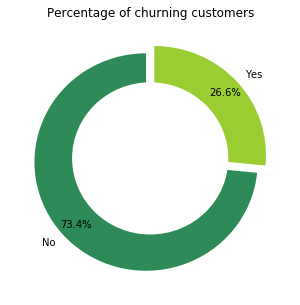

In [21]:
_ = plt.rcParams['figure.figsize'] = [5, 5]

labels = churn_perc.index.tolist()
colors = ['#2E8B57', '#9ACD32']
explode = (0.05, 0.05)
_ = plt.figure(figsize=(5,5))
_ = plt.pie(churn_perc, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
_ = plt.title('Percentage of churning customers')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Distribution of different variables amongst churning and not churning customers:

In [22]:
#Categorical variables:

def pie_chart(column):

    plt.figure(1, figsize=(15,5))
    the_grid = GridSpec(1, 2)

    colors_list = ['#2E8B57', '#9ACD32', '#66b3ff', '#20B2AA', '#ff9999', '#FF8C00']
    explodes = [(0.05), (0.05, 0.05), (0.05, 0.05, 0.05), (0.05, 0.05, 0.05, 0.05), (0.05, 0.05, 0.05, 0.05, 0.05), (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)]

    plt.subplot(the_grid[0, 0], aspect=1, title='Churning customers')

    churn_group = churn.groupby(column).agg({'customerID' : 'count'})

    labels = churn_group.index.tolist()
    colors = []
    for i in range(len(churn_group.index.tolist())):
        colors.append(colors_list[i])

    explode = explodes[len(churn_group.index.tolist())- 1]
    
    _ = plt.pie(churn_group, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)



    plt.subplot(the_grid[0, 1], aspect=1, title='Not Churning customers')

    no_churn_group = no_churn.groupby(column).agg({'customerID' : 'count'})

    labels = no_churn_group.index.tolist()
    colors = []
    for i in range(len(no_churn_group.index.tolist())):
        colors.append(colors_list[i])
        
    explode = explodes[len(no_churn_group.index.tolist()) - 1]
    
    _ = plt.pie(no_churn_group, colors = colors, labels=labels, 
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.suptitle((column + ' distribution amongst churning and not churning customers'), fontsize=16)

    plt.show()


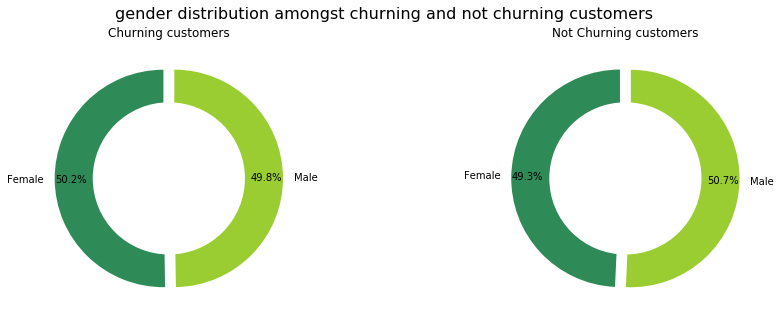

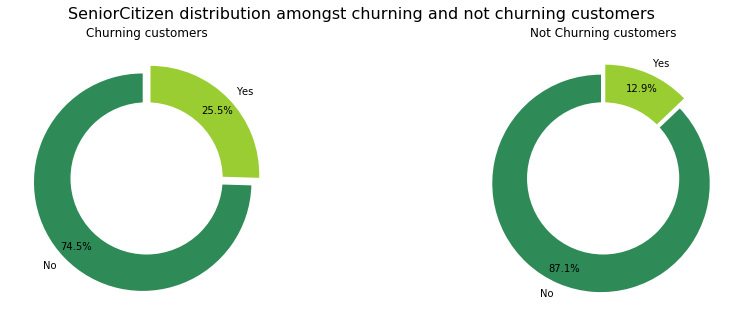

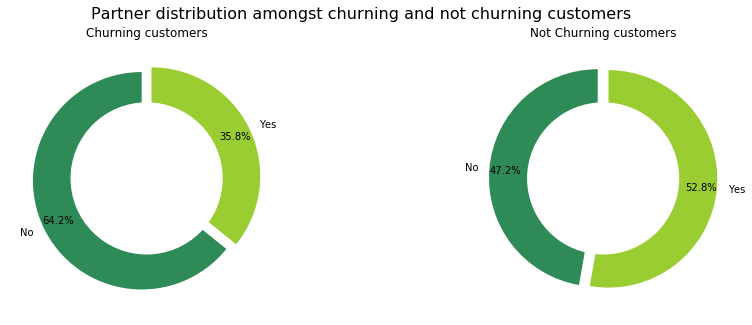

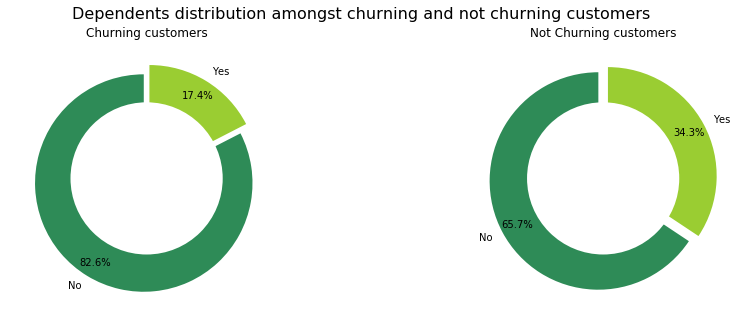

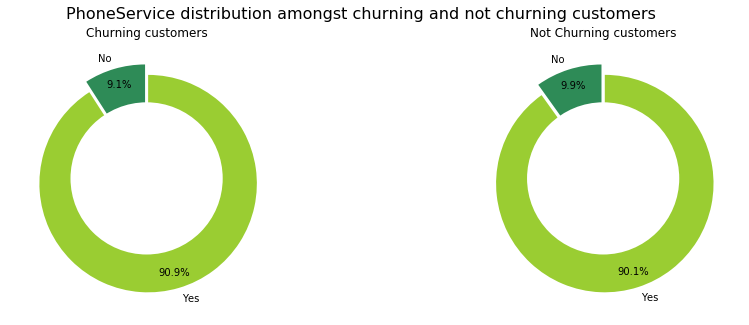

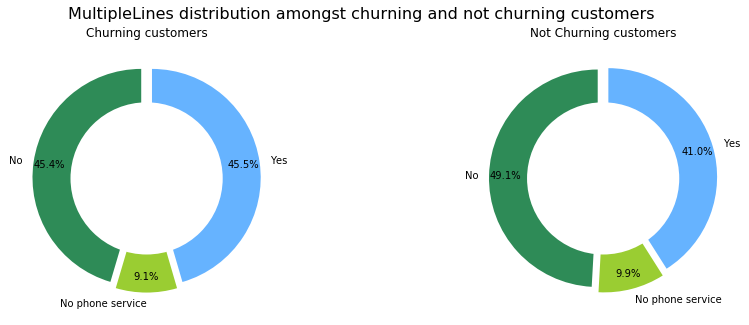

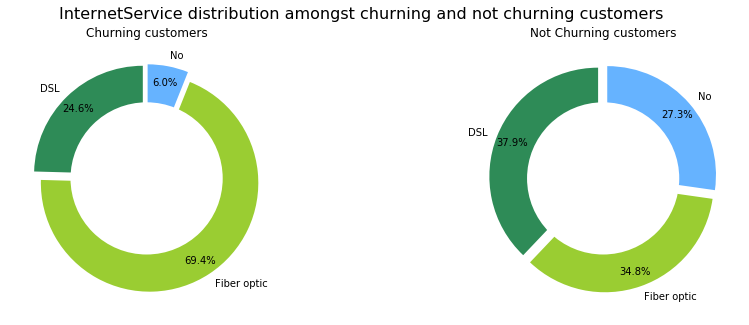

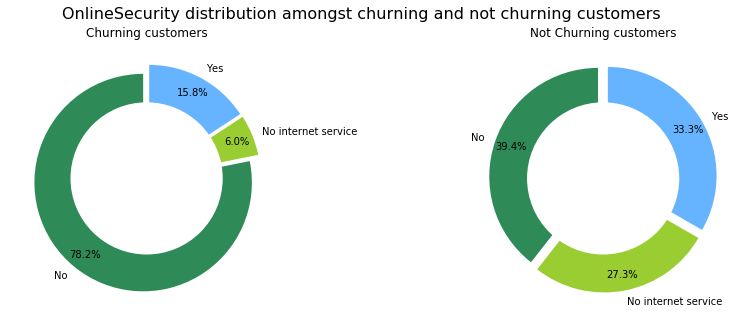

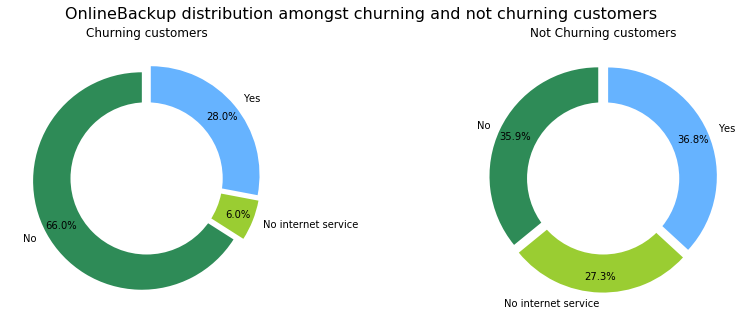

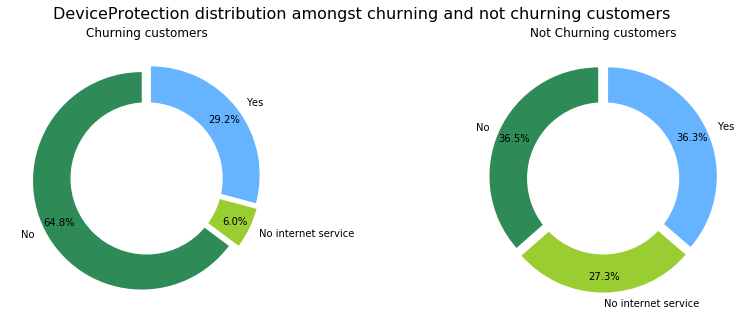

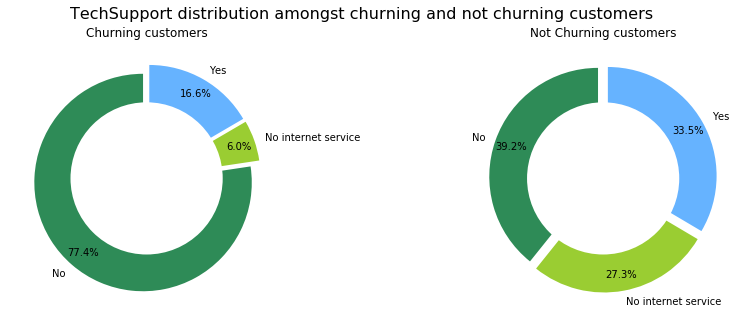

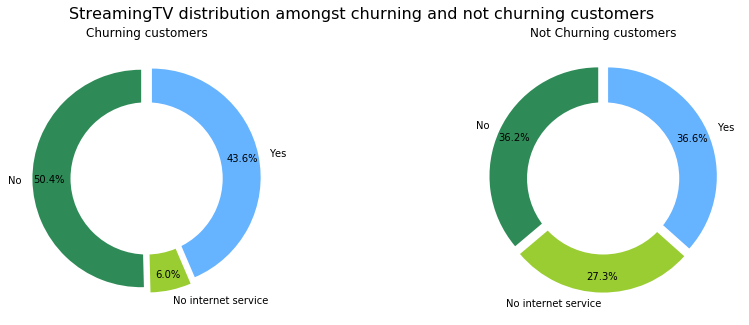

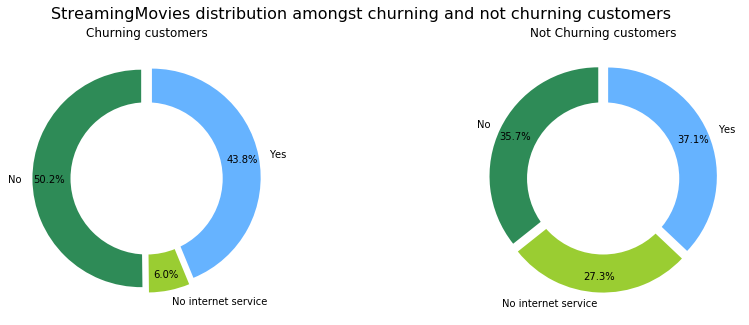

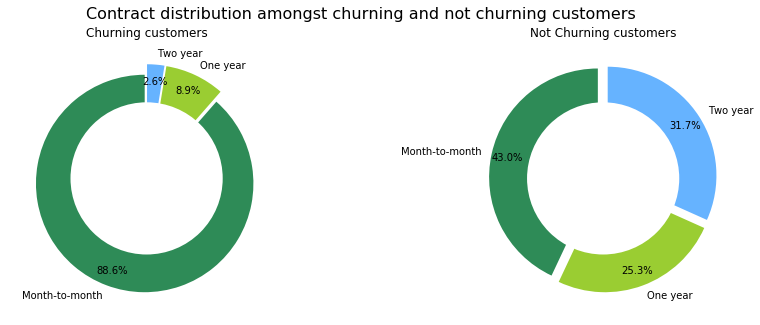

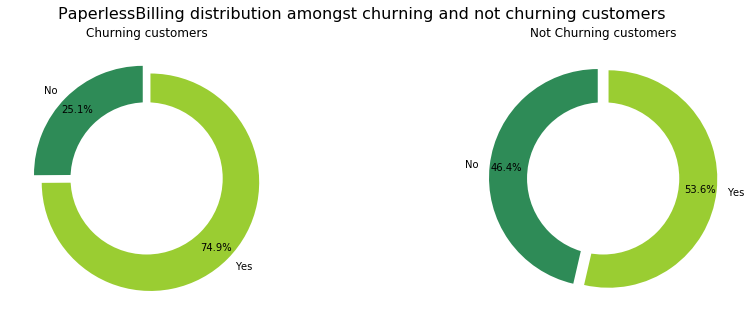

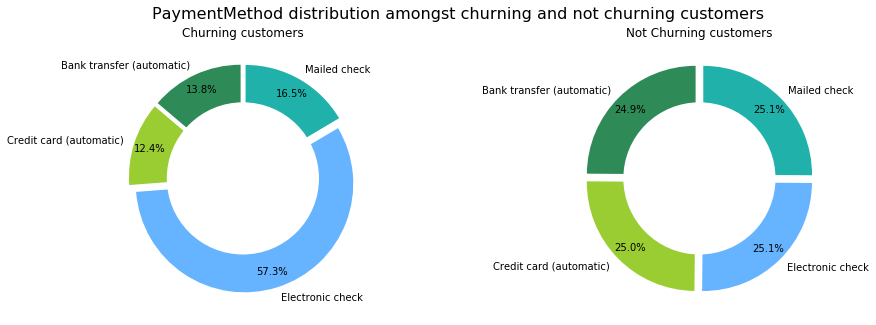

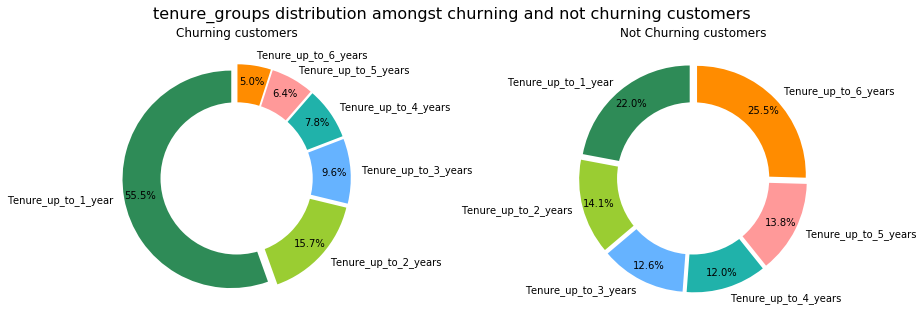

In [23]:
categorical = cat_variables_list.copy()
categorical.remove('Churn')

for i in categorical[1:]:
    pie_chart(i)

#### Description of the categorical variables analysis:
- gender should not influence churn,
- there are slightly more seniors in the group of churners,
- customers without partners are more prone to churn,
- customers without dependents are more prone to churn,
- having or not phone service should not have any impact on churn,
- multiple-line service should not significantly influence churn, 
- customers with fiber optic Internet service are more exposed to churn,
- customers who haven't got online security service, online backup service, device security service and tech support service are expected to by more prone to churn,
- customers subscribing streaming TV and streaming movies are more exposed to churn,
- the most churn endangered group of customers are those who have month-to-month subscription,
- customers having paperless billing are more prone to churn,
- the most popular type of payment mehod is electronic check and customers preferring this kind of payment are more endangered by churn than others,
- longer tenure period less tendency to churn.

In [24]:
#numerical variables:

def histograms(column):
    
    plt.figure(1, figsize=(20,8))
    plt.rcParams['font.size'] = 16

    bins = round(np.sqrt(len(churn[column]))).astype('int64')

    _ = plt.hist([churn[column], no_churn[column]], bins = bins, normed = True, color = ['#2E8B57', '#9ACD32'], label = ['Churn', 'No_Churn'])
    _ = plt.xlabel(column)
    _ = plt.ylabel('Fraction')
    _ = plt.legend()
    _ = plt.title('Histogram of ' + column + ' amongst churning and not churning customers')

    _ = plt.show()
    

C:\Users\Ola\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


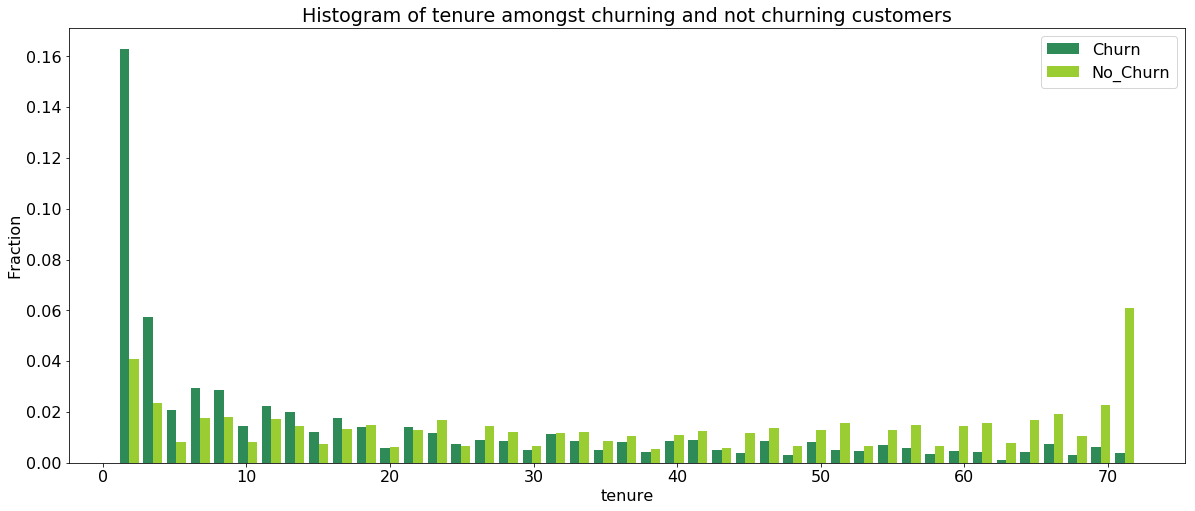

C:\Users\Ola\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


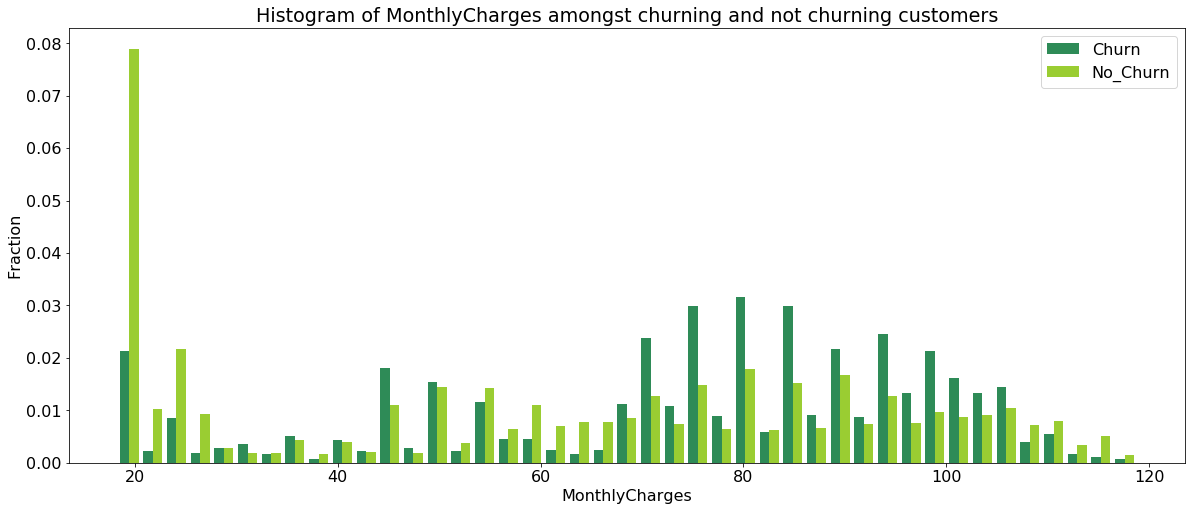

C:\Users\Ola\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


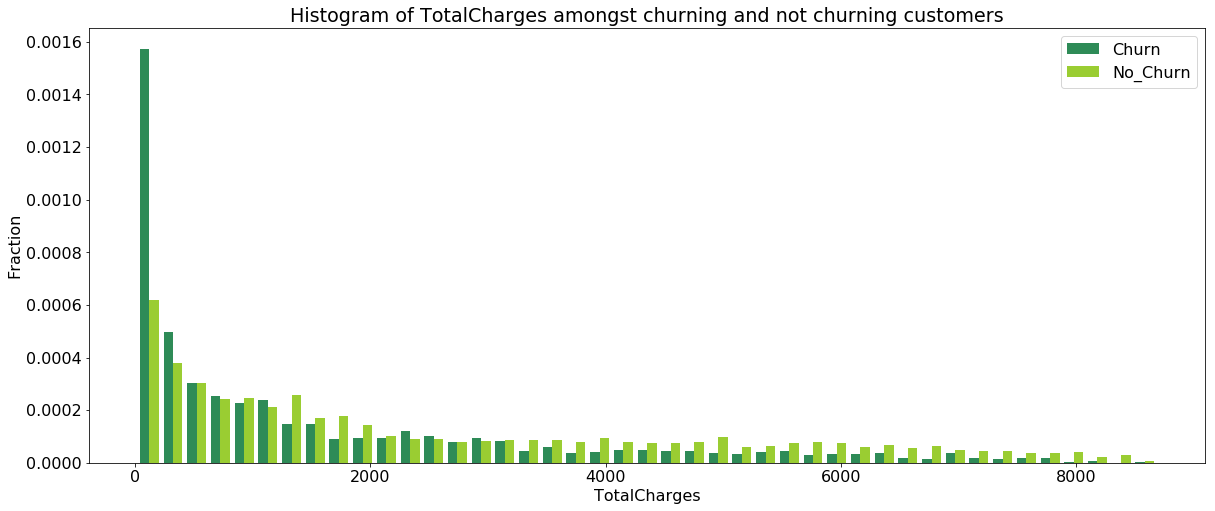

In [25]:
for i in num_variables_list:
    histograms(i)

#### Descriprion of numerical variables analysis:
- longer tenure period lower churn risk,
- most of churners have their monthly charges between 70 and 110 (upper limit of all charges).

### Analysing some other dependences:

#### Checking whether there is any relationship between having tech suport service and the customer age:

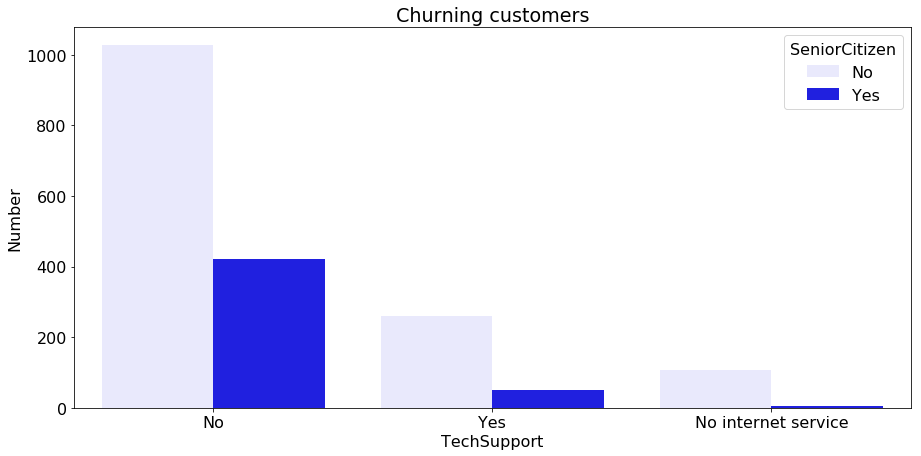

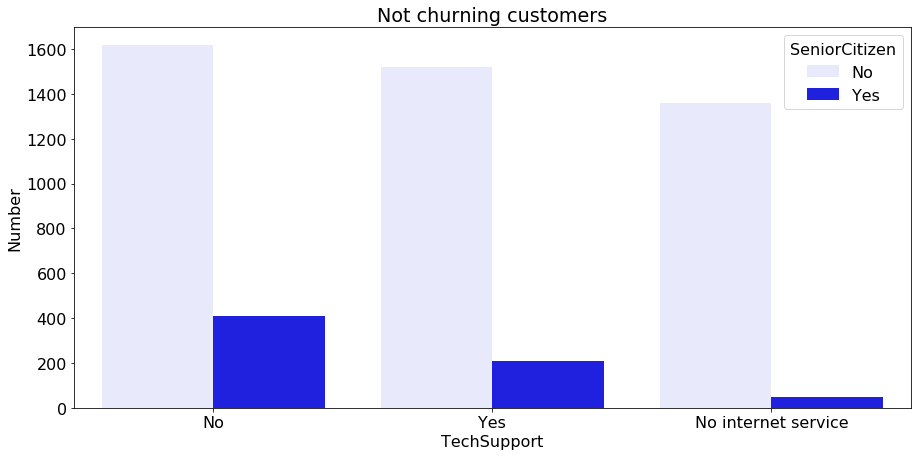

In [26]:
_ = plt.figure(1, figsize=(15, 7))
_ = sns.countplot(x = churn.TechSupport, hue = churn.SeniorCitizen, color = 'blue')
_ = plt.ylabel('Number')
_ = plt.title('Churning customers')
_ = plt.show()

_ = plt.figure(1, figsize=(15, 7))
_ = sns.countplot(x = no_churn.TechSupport, hue = no_churn.SeniorCitizen, color = 'blue')
_ = plt.ylabel('Number')
_ = plt.title('Not churning customers')
_ = plt.show()

#### Checking how much additional services with huge churn rate affect monthly charges:

In [27]:
def violin_plot(column):
    _ = plt.figure(1, figsize = (15, 7))
    _ = sns.violinplot(data = df, x = column, y = 'MonthlyCharges', hue = 'Churn', color = 'green')
    _ = plt.title(column + " impact on MonthlyCharges")
    _ = plt.show()

C:\Users\Ola\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


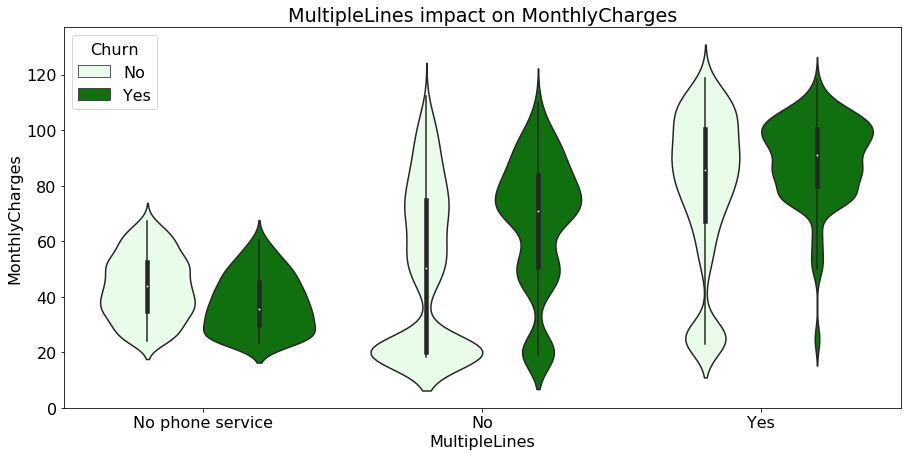

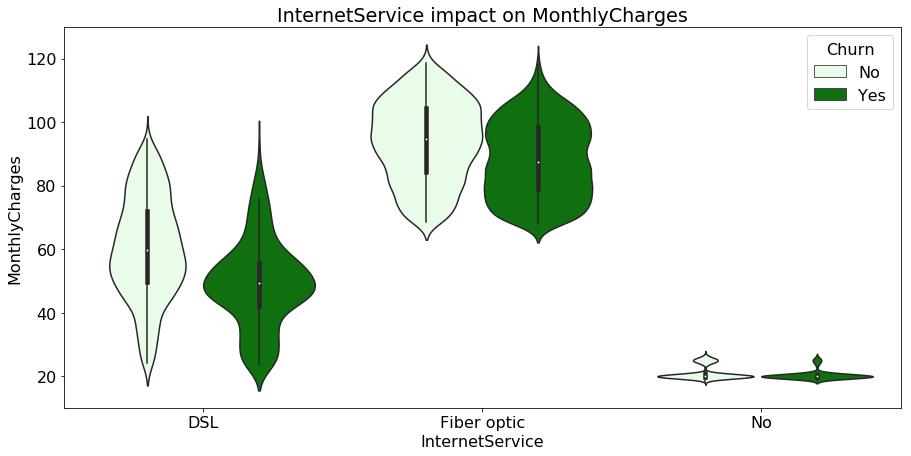

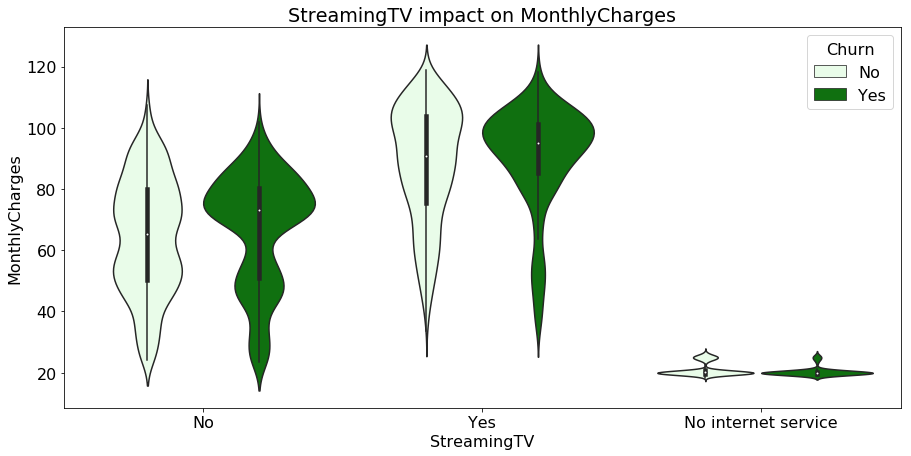

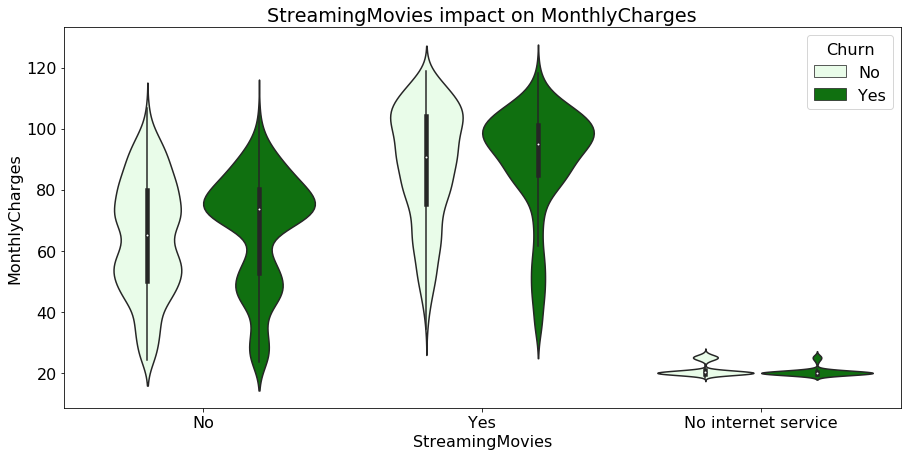

In [28]:
for i in ['MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']:
    violin_plot(i)

#### Results of analysis:
- there is no significant relationship between the age of the customer and using tech support service, moreover, more young people than seriors have this kind of service in their subscription,
- multiple lines, fiber optic Internet service, streaming TV and streaming movies strongly influence customer monthly charges.

## 5. Data preprocessing:

### Descriptive statistics:

#### Numerical variables:

In [29]:
df_ml = df.copy()
df_ml[num_variables_list].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#### Significant difference between mean and median for TotalCharges suggests that this variable probably has got skewed distribution.

#### Categorical variables:

In [30]:
df_ml[cat_variables_list].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_groups
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,6
top,9821-POOTN,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Tenure_up_to_1_year
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163,2175


#### Analysis of numerical variables distributions:

In [31]:
def distribution(variable):
    #Density plot
    plt.figure(figsize=(13,7))
    sns.set(font_scale=1.4, style="whitegrid")
    sns.kdeplot(df_ml[variable], shade = True, color = '#2E8B57').set(title = 'Density plot - "' + variable + '"', xlabel = variable, ylabel = '')
    plt.show()
    
    #Box plot
    plt.figure(figsize=(13,7))
    sns.set(font_scale=1.4, style="whitegrid")
    sns.boxplot(df_ml[variable], color = '#2E8B57').set(title = 'Box plot - "' + variable + '"', xlabel =variable, ylabel = 'number of observations')
    plt.show()

    #Normal dstribution test
    #Statistical significance level  alfa = 0.05
    if (scipy.stats.normaltest(df_ml[variable])[1] < 0.05):
        print("Rejecting null hypothesis and accepting the alternative one: the variable doesn't come from normal distribution.")
    else:
        print("Accepting null hypothesis: the variable comes from the normal distribution.")

C:\Users\Ola\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


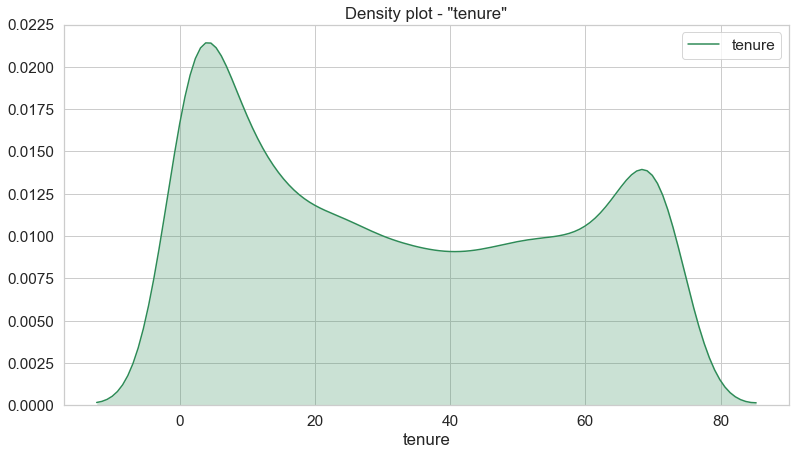

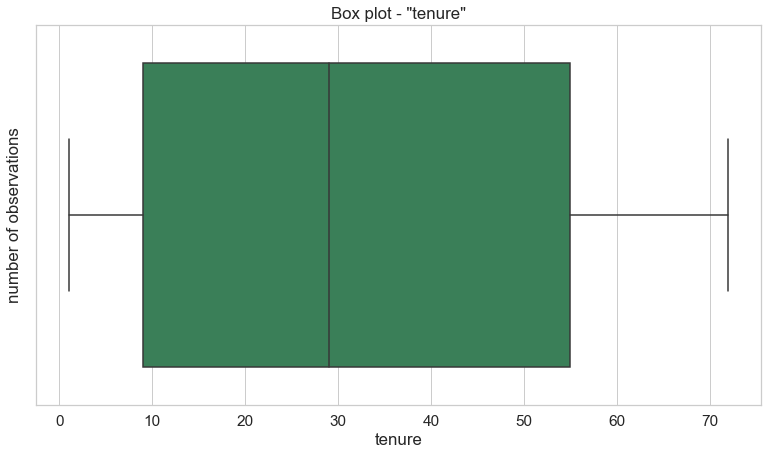

Rejecting null hypothesis and accepting the alternative one: the variable doesn't come from normal distribution.


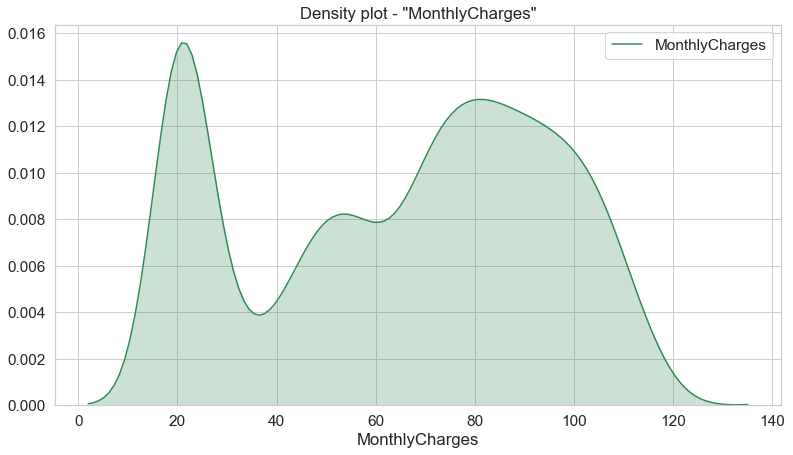

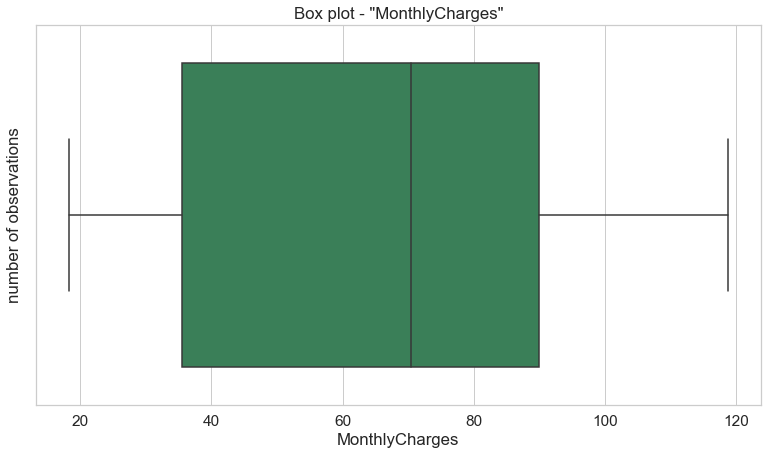

Rejecting null hypothesis and accepting the alternative one: the variable doesn't come from normal distribution.


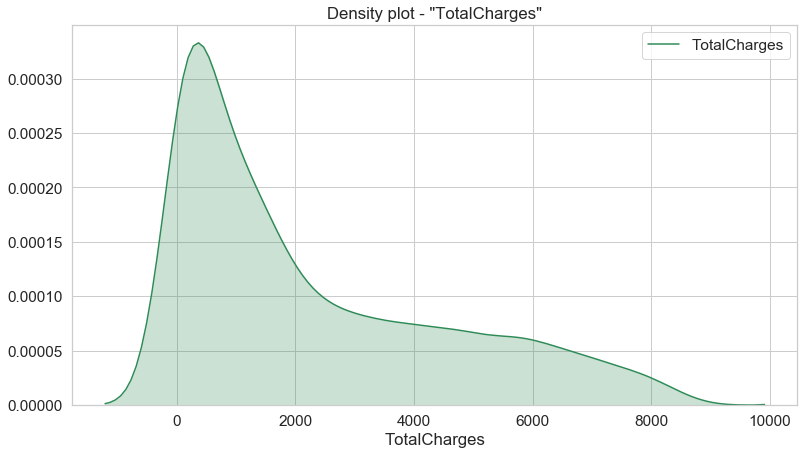

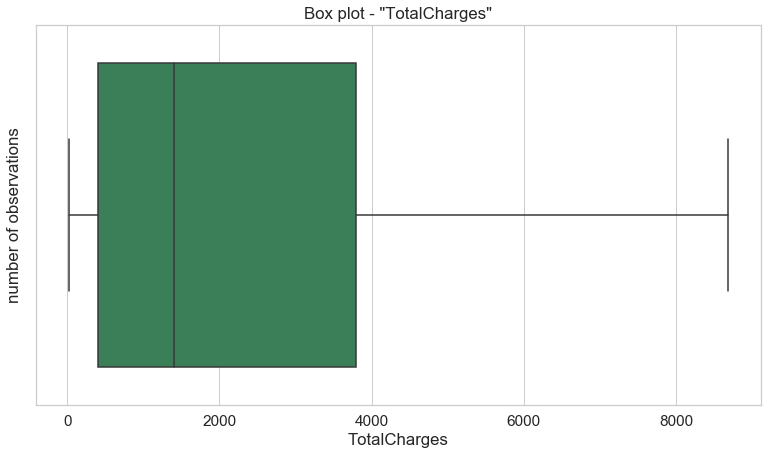

Rejecting null hypothesis and accepting the alternative one: the variable doesn't come from normal distribution.


In [32]:
for i in num_variables_list:
    distribution(i)

#### No numerical variable comes from normal distribution and also there are no outliers in this dataset.

### Analysis of relationships between particular variables:

#### Analysis of relationships between numerical variables and the target variable:

In [33]:
df_ml['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
if 'Churn' not in num_variables_list:
    num_variables_list.append('Churn')

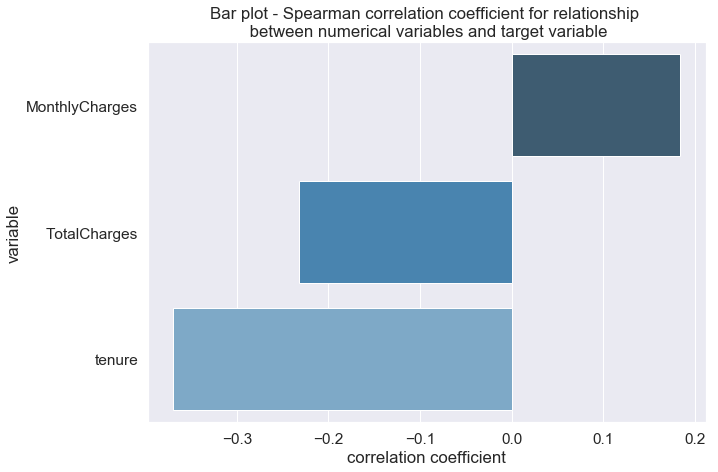

In [34]:
#Using Spearman correlation. Cannot use Pearson correlation due to lack of normal distribution of numerical variables.
corr_num_y = pd.DataFrame(scipy.stats.spearmanr(df_ml[num_variables_list])[0],
columns = num_variables_list,
index = num_variables_list).iloc[-1,:-1]
corr_num_y = pd.DataFrame(corr_num_y)
corr_num_y.reset_index(inplace=True)
 
# wykres słupkowy współczynnika korelacji
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.barplot(data = corr_num_y.sort_values('Churn', ascending=False), x = 'Churn', y = 'index', palette = 'Blues_d').set(title = 'Bar plot - Spearman correlation coefficient for relationship \n between numerical variables and target variable', xlabel = 'correlation coefficient', ylabel = 'variable')
plt.show()

#### Analysis of relationships between categorical variables and the target variable:

In [35]:
#Using CramersV method:
def CramersV(tab):
    a = scipy.stats.chi2_contingency(tab)[0]/sum(tab.sum())
    b = min(tab.shape[0]-1, tab.shape[1]-1,)
    return(np.sqrt(a/b))
 
def CalculateCrammersV(tab):
    ret = []
    for m in tab:
        row = []
        for n in tab:
            cross_tab = pd.crosstab(tab[m].values,tab[n].values)
            row.append(CramersV(cross_tab))
        ret.append(row)
    return pd.DataFrame(ret, columns=tab.columns, index=tab.columns)

In [36]:
c_variables = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_groups']
df_ml['Churn'] = df_ml['Churn'].astype('category')

cat_y = pd.DataFrame(CalculateCrammersV(df_ml[c_variables]).iloc[0,1:])
cat_y.reset_index(inplace = True)

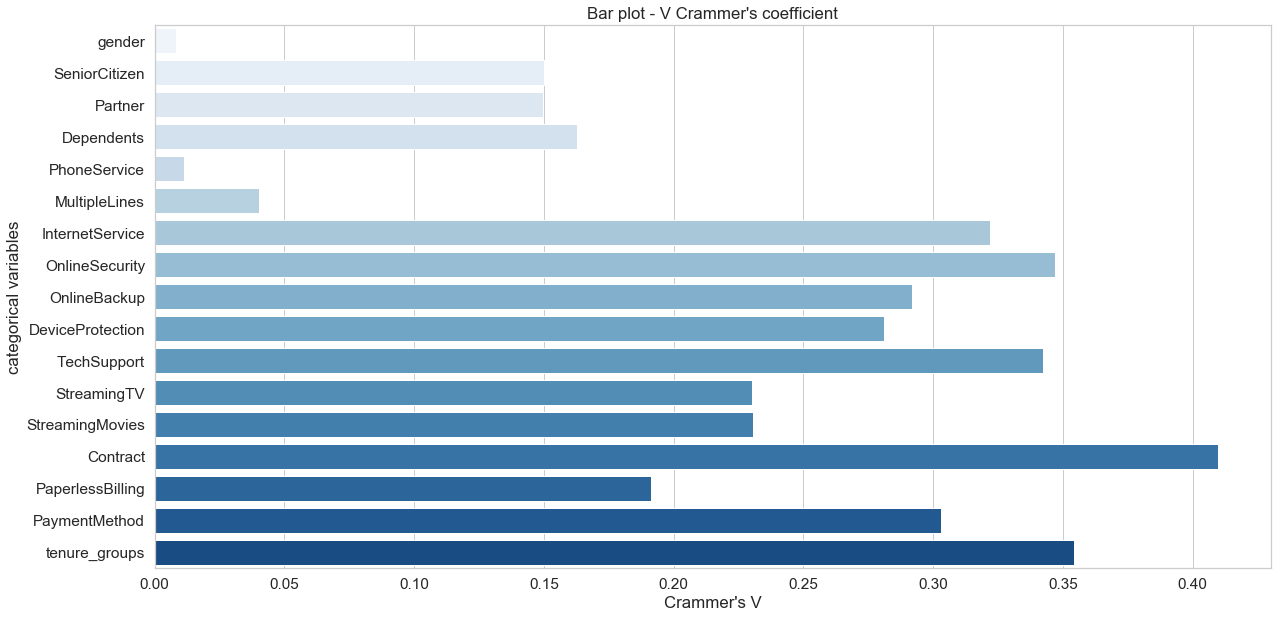

In [37]:
plt.figure(figsize=(20,10))
cmap = sns.color_palette("Blues", n_colors=len(c_variables))
sns.set(font_scale=1.4, style="whitegrid")
sns.barplot(data = cat_y, x = 'Churn', y = 'index', orient = 'h', palette = cmap).set(title = "Bar plot - V Crammer's coefficient", ylabel = 'categorical variables', xlabel = 'Crammer\'s V')
plt.show()

#### Analysis of the relationship between all numerical variables:

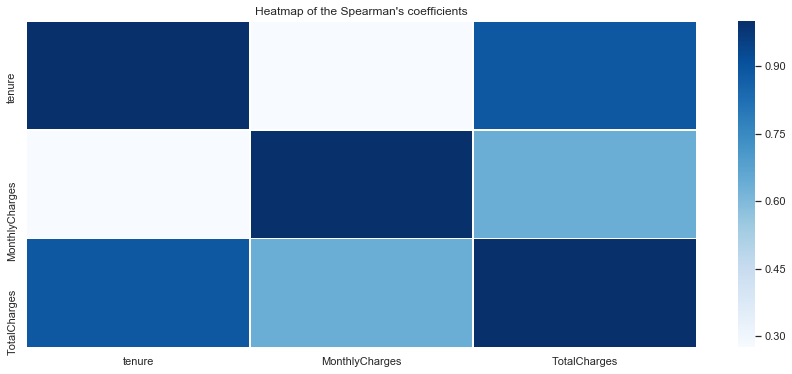

In [38]:
corr_num = pd.DataFrame(scipy.stats.spearmanr(df_ml[num_variables_list[:-1]])[0],
columns = num_variables_list[:-1],
index = num_variables_list[:-1])
 
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(corr_num.abs(), cmap="Blues", linewidths=.5).set(title="Heatmap of the Spearman's coefficients")
plt.show()

#### Analysis of the relationship between all categorical variables:

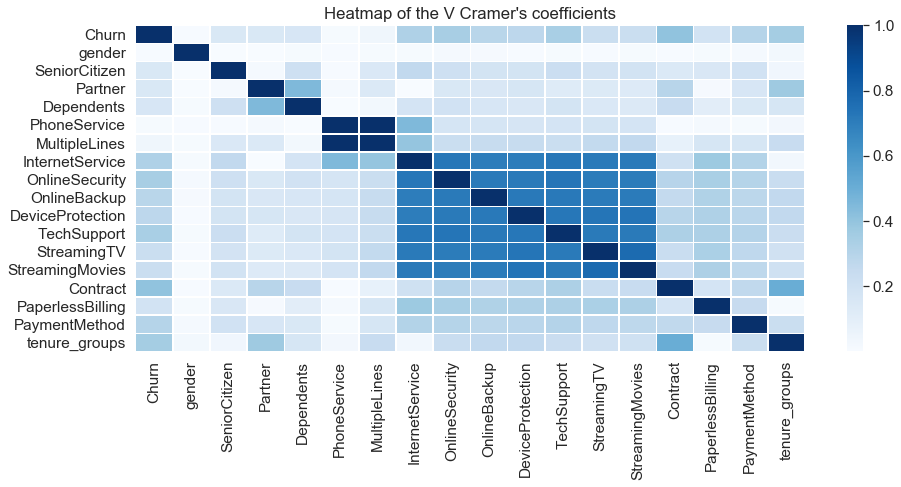

In [39]:
crammer = CalculateCrammersV(df_ml[c_variables])
 
plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(crammer, cmap="Blues", linewidths=.5).set(title="Heatmap of the V Cramer's coefficients")
plt.show()

#### Analysis of the relationship between numerical and categorical variables:

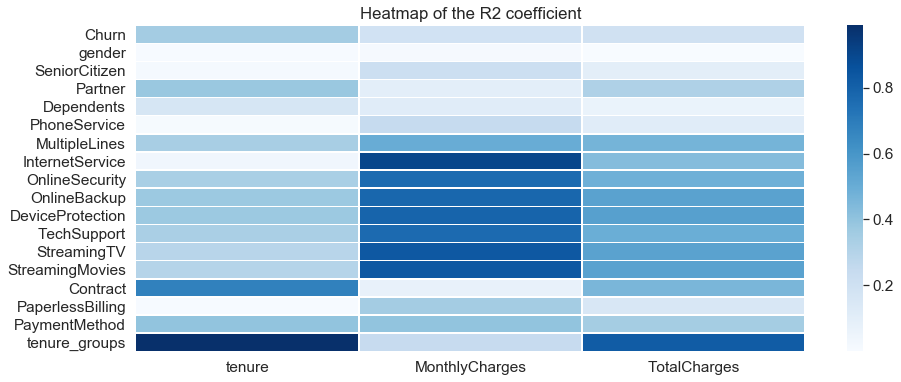

In [40]:
cat_cols = c_variables
num_cols = num_variables_list[:-1]
 
cols = []
for cat in cat_cols:
    rows = []
    for num in num_cols:
        formula = num + '~' +cat
        model = sm.ols(formula=formula,data=df)
        rows.append(np.sqrt(model.fit().rsquared))
    cols.append(rows)
corr_num_cat = pd.DataFrame(cols, index = cat_cols, columns = num_cols)
 
plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(corr_num_cat, cmap="Blues", linewidths=.5).set(title='Heatmap of the R2 coefficient')
plt.show()

### Changing encoding of categorical variables:

In [41]:
for i in c_variables:
    print("{}: {}" .format(i, df_ml[i].unique().tolist()))

Churn: [0, 1]
gender: ['Female', 'Male']
SeniorCitizen: ['No', 'Yes']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
OnlineBackup: ['Yes', 'No', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service']
StreamingTV: ['No', 'Yes', 'No internet service']
StreamingMovies: ['No', 'Yes', 'No internet service']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
tenure_groups: ['Tenure_up_to_1_year', 'Tenure_up_to_3_years', 'Tenure_up_to_4_years', 'Tenure_up_to_2_years', 'Tenure_up_to_6_years', 'Tenure_up_to_5_years']


In [42]:
df_ml['MultipleLines'].replace({'No phone service' : 'No_phone_service'}, inplace = True)
df_ml['InternetService'].replace({'Fiber optic' : 'Fiber_optic'}, inplace = True)
df_ml['OnlineSecurity'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['OnlineBackup'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['DeviceProtection'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['TechSupport'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['StreamingTV'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['StreamingMovies'].replace({'No internet service' : 'No_internet_service'}, inplace = True)
df_ml['Contract'].replace({'One year' : 'One_year', 'Two year' : 'Two_year'}, inplace = True)
df_ml['PaymentMethod'].replace({'Electronic check' : 'Electronic_check', 'Mailed check' : 'Mailed_check', 'Bank transfer (automatic)' : 'Bank_transfer_(automatic)', 'Credit card (automatic)' : 'Credit_card_(automatic)'}, inplace = True)

In [43]:
for i in c_variables:
    df_ml[i] = df_ml[i].astype('category')

In [44]:
df_ml = pd.get_dummies(df_ml, columns=c_variables[1:])

In [45]:
df_ml.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Co

In [46]:
df_ml.drop(axis = 1, labels = ['customerID', 'gender_Female', 'SeniorCitizen_No', 'Partner_No', 'Dependents_No', 
                               'PhoneService_No', 'MultipleLines_No_phone_service', 'InternetService_No', 
                               'OnlineSecurity_No_internet_service', 'OnlineBackup_No_internet_service', 
                               'DeviceProtection_No_internet_service', 'TechSupport_No_internet_service', 
                               'StreamingTV_No_internet_service', 'StreamingMovies_No_internet_service', 
                               'Contract_Two_year', 'PaperlessBilling_No', 'PaymentMethod_Mailed_check', 
                               'tenure_groups_Tenure_up_to_6_years'], inplace = True)

## 6. Building machine learning models:

In [47]:
target = df_ml['Churn'].copy()
data = df_ml.drop(['Churn'], axis = 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123, stratify = target)

#### Decision Tree Classifier:

In [49]:
#Model 1 - benchmark:
model = DecisionTreeClassifier(random_state = 123)
cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Mean Accuracy: ' + str(cv.mean().round(3)))
print('Stability: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Mean Accuracy: 0.734
Stability: 2.445%


In [50]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.721


In [51]:
#Model 2 (GridSearch 1 parameter selection):
parameters = {'criterion':('entropy', 'gini'), 'splitter':('best','random'), 'max_depth':np.arange(1,10), 'min_samples_split':np.arange(2,10), 'min_samples_leaf':np.arange(1,5)}

In [52]:
classifier = GridSearchCV(DecisionTreeClassifier(random_state = 123), parameters, cv=10)
classifier.fit(X_train, y_train)
classifier.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [53]:
cv = cross_val_score(DecisionTreeClassifier(**classifier.best_params_, random_state = 123), X_train, y_train, cv = 10, scoring = 'accuracy')
print('Mean Accuracy: ' + str(cv.mean().round(3)))
print('Stability: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Mean Accuracy: 0.798
Stability: 1.6%


In [54]:
#Model 3 (RFE feature selection + GridSearch 1 parameter selection):
acc_all = []
stab_all = []
for m in np.arange(0,20):
    stab_loop = []
    acc_loop = []
    for n in np.arange(5, 20, 1):
        selector = RFE(model, n, 1)
        cv = cross_val_score(model, X_train.iloc[:,selector.fit(X_train, y_train).support_], y_train, cv = 10, scoring = 'accuracy')
        acc_loop.append(cv.mean())
        stab_loop.append(cv.std()*100/cv.mean())
    acc_all.append(acc_loop)
    stab_all.append(stab_loop)
acc = pd.DataFrame(acc_all, columns = np.arange(5, 20, 1))
stab = pd.DataFrame(stab_all, columns = np.arange(5, 20, 1))

print('Accuracy: ')
print(acc.agg(['mean']))
print('Stability: ')
print(stab.agg(['mean']))

Accuracy: 
            5         6         7        8         9         10       11  \
mean  0.730484  0.733153  0.732797  0.73138  0.738838  0.745237  0.73955   

            12       13        14        15        16        17        18  \
mean  0.743104  0.74115  0.735817  0.736704  0.735815  0.733686  0.730482   

            19  
mean  0.734217  
Stability: 
            5         6         7         8         9       10        11  \
mean  2.308693  3.214689  3.255911  3.586913  2.838927  2.5067  2.807033   

            12        13        14        15        16        17        18  \
mean  2.166501  2.014975  2.484658  2.523905  2.740523  2.132092  3.355015   

            19  
mean  2.706118  


In [55]:
#Model 4 (RFE feature selection + GridSearch 2 parameter selection):
selector = RFE(model, 12, 1)
cols = X_train.iloc[:,selector.fit(X_train, y_train).support_].columns
print(cols)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Dependents_Yes', 'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineBackup_No', 'Contract_Month-to-month', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic_check'],
      dtype='object')


In [56]:
classifier2 = GridSearchCV(DecisionTreeClassifier(random_state = 123), parameters, cv=10)
classifier2.fit(X_train[cols], y_train)
print(classifier2.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}


In [57]:
cv = cross_val_score(DecisionTreeClassifier(**classifier2.best_params_, random_state = 123), X_train[cols], y_train, cv = 10, scoring = 'accuracy')
print('Mean Accuracy: ' + str(cv.mean().round(3)))
print('Stability: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Mean Accuracy: 0.798
Stability: 2.302%


In [58]:
#Final score:
model = DecisionTreeClassifier(**classifier2.best_params_, random_state = 123)
model.fit(X_train[cols], y_train)
pred = model.predict(X_test[cols])
print('Final Decision Tree accuracy: ' + str(round(accuracy_score(pred, y_test),3)))

Final Decision Tree accuracy: 0.786


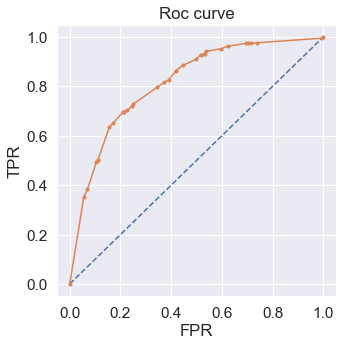

In [59]:
# ROC curve
y_pred_proba = model.predict_proba(X_test[cols])[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plot no skill
_ = plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
_ = plt.plot(fpr, tpr, marker='.')
_ = plt.title('Roc curve')
_ = plt.xlabel('FPR')
_ = plt.ylabel('TPR')

# show the plot
plt.show()

f1=0.554 auc=0.642 ap=0.580


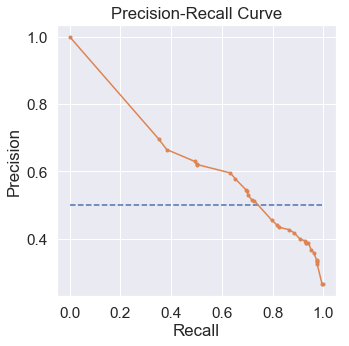

In [60]:
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# calculate F1 score
f1 = f1_score(y_test, pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, y_pred_proba)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
_ = plt.plot(recall, precision, marker='.')
_ = plt.title('Precision-Recall Curve')
_ = plt.xlabel('Recall')
_ = plt.ylabel('Precision')
# show the plot
plt.show()

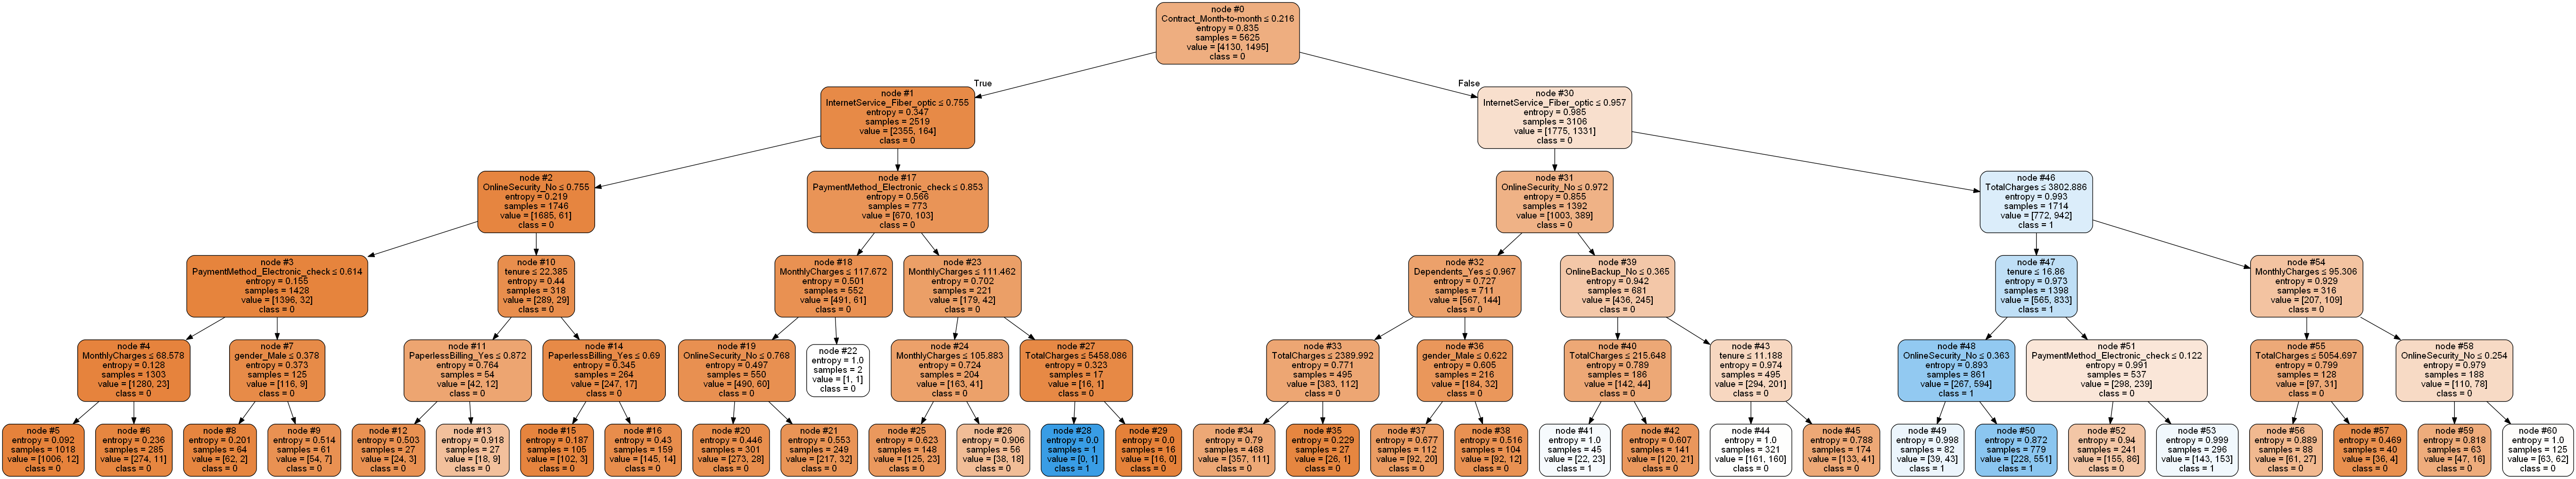

In [61]:
#Visualization

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,
                feature_names = cols,
                class_names=['0','1'],
                filled=True, rounded=True,
                node_ids=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())